# House Prices: Advanced Regression Techniques
### repo: https://github.com/Gxrco/HT3-DM

## Análsis exploratorio

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer

sns.set_theme(style="whitegrid")

filePath = './train.csv'

df = pd.read_csv(filePath, encoding="ISO-8859-1")
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Descripción de las Variables del Dataset

| Variable       | Descripción |
|---------------|-------------|
| **MSSubClass** | Tipo de vivienda involucrada en la venta (código numérico). |
| **MSZoning** | Clasificación de zonificación general de la venta. |
| **LotFrontage** | Pies lineales de calle conectados a la propiedad. |
| **LotArea** | Tamaño del lote en pies cuadrados. |
| **Street** | Tipo de acceso por carretera a la propiedad. |
| **Alley** | Tipo de acceso al callejón. |
| **LotShape** | Forma general de la propiedad. |
| **LandContour** | Nivel de la propiedad en relación con su entorno. |
| **Utilities** | Tipo de servicios públicos disponibles. |
| **LotConfig** | Configuración del lote. |
| **LandSlope** | Pendiente del terreno. |
| **Neighborhood** | Ubicación física dentro de los límites de la ciudad. |
| **Condition1** | Proximidad a diversas condiciones. |
| **Condition2** | Segunda proximidad a diversas condiciones (si hay más de una). |
| **BldgType** | Tipo de vivienda. |
| **HouseStyle** | Estilo de la vivienda. |
| **OverallQual** | Calidad general de los materiales y el acabado de la casa. |
| **OverallCond** | Condición general de la casa. |
| **YearBuilt** | Año de construcción original. |
| **YearRemodAdd** | Año de remodelación (igual a `YearBuilt` si no ha habido cambios). |
| **RoofStyle** | Tipo de techo. |
| **RoofMatl** | Material del techo. |
| **Exterior1st** | Cubierta exterior principal de la casa. |
| **Exterior2nd** | Cubierta exterior secundaria de la casa (si hay más de un material). |
| **MasVnrType** | Tipo de revestimiento de mampostería. |
| **MasVnrArea** | Área del revestimiento de mampostería en pies cuadrados. |
| **ExterQual** | Calidad de los materiales en el exterior. |
| **ExterCond** | Condición actual del material en el exterior. |
| **Foundation** | Tipo de cimentación. |
| **BsmtQual** | Altura del sótano. |
| **BsmtCond** | Condición general del sótano. |
| **BsmtExposure** | Exposición del sótano a nivel de jardín. |
| **BsmtFinType1** | Tipo de acabado del sótano 1. |
| **BsmtFinSF1** | Pies cuadrados de área terminada del sótano tipo 1. |
| **BsmtFinType2** | Tipo de acabado del sótano 2. |
| **BsmtFinSF2** | Pies cuadrados de área terminada del sótano tipo 2. |
| **BsmtUnfSF** | Pies cuadrados sin terminar del sótano. |
| **TotalBsmtSF** | Área total en pies cuadrados del sótano. |
| **Heating** | Tipo de calefacción. |
| **HeatingQC** | Calidad y estado del sistema de calefacción. |
| **CentralAir** | Aire acondicionado centralizado (Sí/No). |
| **Electrical** | Sistema eléctrico. |
| **1stFlrSF** | Pies cuadrados del primer piso. |
| **2ndFlrSF** | Pies cuadrados del segundo piso. |
| **LowQualFinSF** | Pies cuadrados de áreas terminadas de baja calidad. |
| **GrLivArea** | Área habitable sobre el nivel del suelo en pies cuadrados. |
| **BsmtFullBath** | Número de baños completos en el sótano. |
| **BsmtHalfBath** | Número de medios baños en el sótano. |
| **FullBath** | Número de baños completos sobre el nivel del suelo. |
| **HalfBath** | Número de medios baños sobre el nivel del suelo. |
| **Bedroom** | Número de habitaciones sobre el nivel del suelo (excluye sótanos). |
| **Kitchen** | Número de cocinas sobre el nivel del suelo. |
| **KitchenQual** | Calidad de la cocina. |
| **TotRmsAbvGrd** | Número total de habitaciones sobre el nivel del suelo (excluye baños). |
| **Functional** | Funcionalidad del hogar. |
| **Fireplaces** | Número de chimeneas. |
| **FireplaceQu** | Calidad de la chimenea. |
| **GarageType** | Ubicación del garaje. |
| **GarageYrBlt** | Año de construcción del garaje. |
| **GarageFinish** | Acabado interior del garaje. |
| **GarageCars** | Tamaño del garaje en capacidad de autos. |
| **GarageArea** | Tamaño del garaje en pies cuadrados. |
| **GarageQual** | Calidad del garaje. |
| **GarageCond** | Condición del garaje. |
| **PavedDrive** | Tipo de pavimentación de la entrada. |
| **WoodDeckSF** | Área de la terraza de madera en pies cuadrados. |
| **OpenPorchSF** | Área del porche abierto en pies cuadrados. |
| **EnclosedPorch** | Área del porche cerrado en pies cuadrados. |
| **3SsnPorch** | Área del porche de tres estaciones en pies cuadrados. |
| **ScreenPorch** | Área del porche con mosquitero en pies cuadrados. |
| **PoolArea** | Área de la piscina en pies cuadrados. |
| **PoolQC** | Calidad de la piscina. |
| **Fence** | Calidad de la cerca. |
| **MiscFeature** | Característica adicional no cubierta en otras categorías. |
| **MiscVal** | Valor en dólares de la característica adicional. |
| **MoSold** | Mes en que se vendió la casa. |
| **YrSold** | Año en que se vendió la casa. |
| **SaleType** | Tipo de venta. |
| **SaleCondition** | Condición de la venta. |
| **SalePrice** | **Precio de venta de la vivienda (variable objetivo).** |


### Separación de variables categoricas y numericas

In [354]:
df_numerico = df.select_dtypes(include=['number']).copy()

print(df_numerico.head())

df_numerico.info()


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

## Selección de Variables Numéricas

Para facilitar el análisis exploratorio, se han separado las variables numéricas de las categóricas. Se eliminaron las variables de tipo texto y categóricas, dejando únicamente aquellas que contienen datos numéricos.

### **Resultado:**
Se ha obtenido un nuevo DataFrame (`df_numerico`) que contiene exclusivamente las variables numéricas, lo que permitirá realizar análisis estadísticos y de correlación de manera más eficiente. 

**Características del nuevo DataFrame:**
- **Número de columnas:** 38 variables numéricas.
- **Número de filas:** Igual al dataset original.
- **Valores nulos NO han sido modificados**, para analizarlos antes de decidir cómo manejarlos.


In [355]:
df_numerico.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Hallazgos en el describe:
1. Distribución sesgada de algunas variables:
    - LotArea (tamaño del lote): La media es 10,516 pies cuadrados, pero el máximo llega a 215,245, lo que sugiere la presencia de valores atípicos extremos.
    - SalePrice (precio de venta): Hay una gran diferencia entre la media ($180,921) y el máximo ($755,000), lo que indica una posible distribución sesgada.
2. Valores atípicos notables:
    - LotFrontage (frente del lote): Tiene un máximo de 313 pies, mientras que el percentil 75% es 79 pies. Esto indica que hay terrenos con frentes extremadamente grandes.
    - MasVnrArea (área de mampostería): La mayoría de las casas no tienen mampostería (mediana = 0), pero algunas tienen hasta 1,600 pies cuadrados
    - BsmtFinSF1 (área terminada del sótano 1): El máximo es 5,644 pies cuadrados, pero la mediana es 383.5 pies cuadrados, sugiriendo que hay pocos sótanos muy grandes.
    - PoolArea (área de la piscina): La mayoría de las casas no tienen piscina (mediana = 0), pero algunas tienen hasta 738 pies cuadrados.
3. Datos con gran cantidad de ceros:
    - Varias variables como EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal tienen una mediana de 0, lo que indica que la mayoría de las casas no tienen estos elementos
4. Distribución del año de construcción y remodelación:
    - YearBuilt y YearRemodAdd: El mínimo es 1872, mientras que el máximo es 2010. Podemos analizar la evolución de los precios con respecto a la antigüedad de la casa.
5. Número de baños y habitaciones:
    - FullBath y HalfBath: La media de baños completos es 1.56, lo que sugiere que la mayoría de las casas tienen 1 o 2 baños completos, pero algunas pueden tener hasta 3 o más.
    - TotRmsAbvGrd (Total de habitaciones sobre el nivel del suelo): Rango entre 2 y 14 habitaciones, lo que puede influir en el precio de manera significativa.

## Identificación de Valores Atípicos

El primer paso dentro de nuestro análisis exploratorio consiste en identificar **valores atípicos** dentro de las variables numéricas seleccionadas. Los valores atípicos son observaciones que se alejan significativamente de la tendencia general de los datos y pueden afectar la calidad de nuestros modelos predictivos.
### ¿Por qué es importante?
En regresión lineal, los valores extremos pueden distorsionar la relación entre las variables predictoras y el precio de las casas, lo que puede llevar a:
- Coeficientes de regresión sesgados.
- Mal desempeño predictivo.
- Modelos que no generalizan bien a nuevos datos.
### Estrategia
Para cada variable numérica, se analizará:
- **Distribución visual mediante boxplots**.
- **Distribución estadística con histogramas**.
- **Cálculo de rango intercuartil (IQR)** para detección automática.

Este análisis permitirá decidir si se deben transformar, escalar, o incluso remover observaciones en casos extremos.

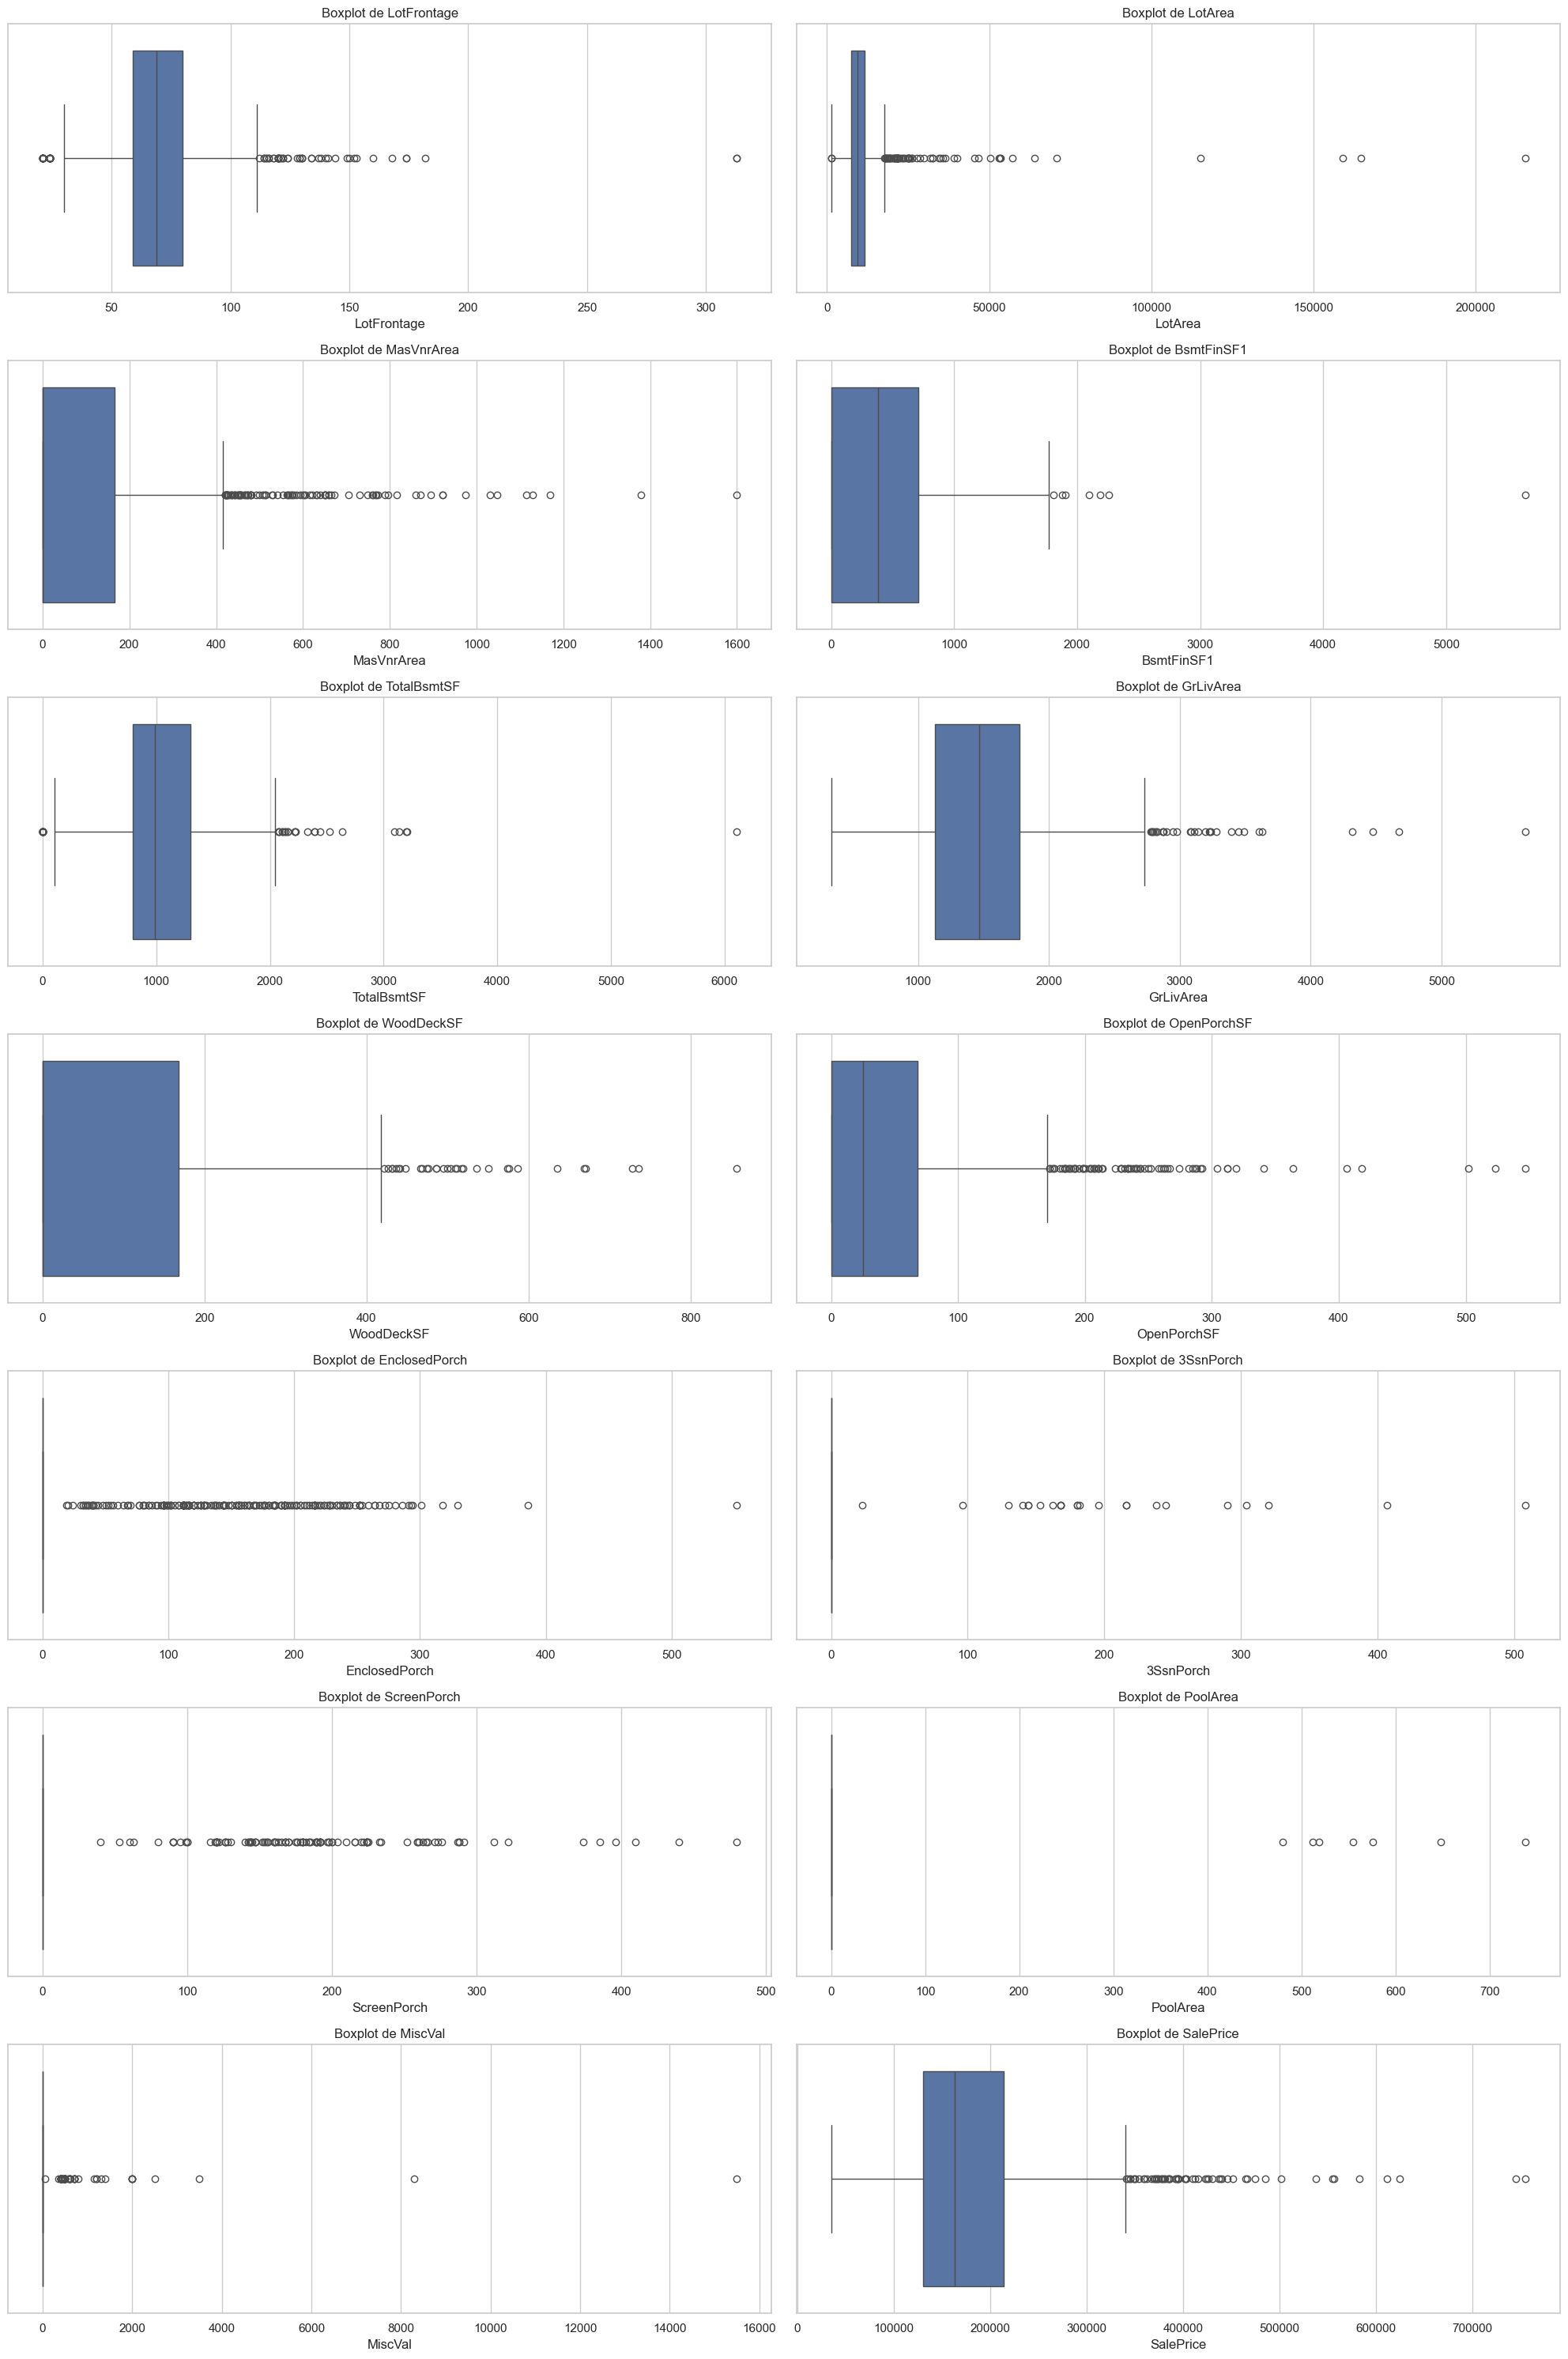

,Outliers Detectados
EnclosedPorch,208
ScreenPorch,116
MasVnrArea,96
LotFrontage,88
OpenPorchSF,77
LotArea,69
TotalBsmtSF,61
SalePrice,61
MiscVal,52
WoodDeckSF,32


In [356]:
variables_numericas = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
    'TotalBsmtSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
    'MiscVal', 'SalePrice'
]

plt.figure(figsize=(20, 30))

for i, col in enumerate(variables_numericas, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

outliers = {}

for col in variables_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers[col] = outliers_count

outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outliers Detectados'])
outliers_df.sort_values(by='Outliers Detectados', ascending=False)


## Análisis de Valores Atípicos
Se realizó un análisis gráfico y cuantitativo de valores atípicos en variables numéricas clave. Utilizamos **boxplots** para identificar visualmente puntos extremos, y adicionalmente calculamos los valores atípicos usando el **Rango Intercuartil (IQR)** para cada variable.
### Hallazgos relevantes
- La mayoría de las variables relacionadas con **espacios exteriores** (porches, terrazas, piscinas) presentan un alto número de valores atípicos. Esto indica que hay propiedades con áreas significativamente más grandes de lo común, lo cual puede estar asociado a viviendas de lujo o propiedades con amenidades especiales.
- Variables clave como **LotArea**, **LotFrontage** y **SalePrice** también presentan valores atípicos considerables. Esto refuerza la idea de que en el mercado hay propiedades excepcionalmente grandes y caras, que podrían sesgar nuestros modelos.
- La variable **MasVnrArea** tiene varios valores atípicos. Es posible que esto refleje propiedades con extensos acabados en mampostería, lo cual también puede tener un impacto directo en el precio.
- Destaca que **EnclosedPorch** es la variable con más outliers (208), lo cual es inusual para una característica que no suele ser tan determinante en el valor de una propiedad.


## Análisis de la Distribución de SalePrice

La variable `SalePrice` es nuestra variable objetivo (target), por lo que es crucial entender su distribución antes de construir modelos. En datasets inmobiliarios, es común que los precios de las viviendas no sigan una distribución normal, sino que estén **sesgados hacia la derecha** debido a la presencia de propiedades de lujo o muy exclusivas.

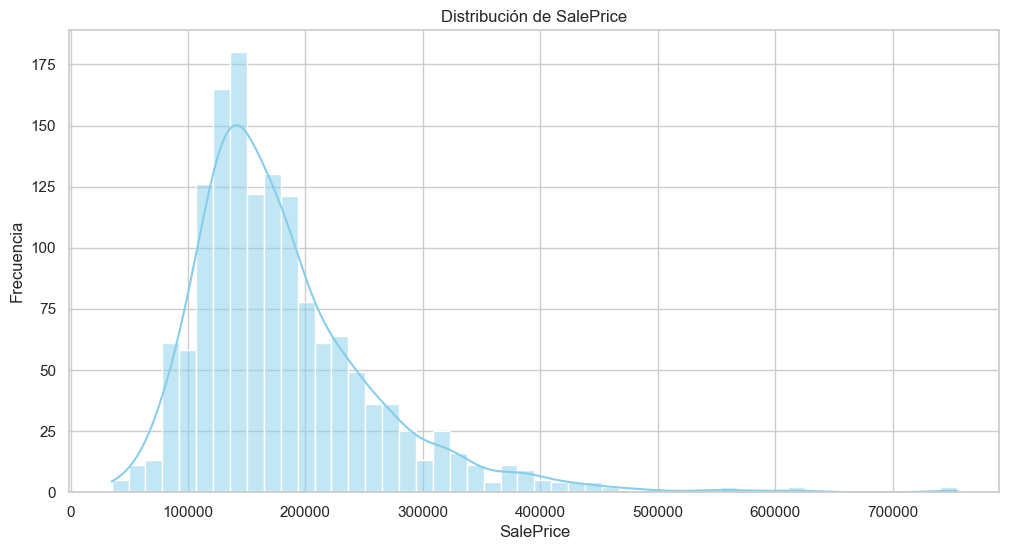

Sesgo (Skewness): 1.88
Curtosis (Kurtosis): 6.51


In [357]:
plt.figure(figsize=(12, 6))

sns.histplot(df['SalePrice'], kde=True, color='skyblue', bins=50)
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

from scipy.stats import skew, kurtosis

skewness = skew(df['SalePrice'])
kurt = kurtosis(df['SalePrice'])

print(f'Sesgo (Skewness): {skewness:.2f}')
print(f'Curtosis (Kurtosis): {kurt:.2f}')


## Análisis de la Distribución de `SalePrice`
El histograma muestra que `SalePrice` presenta una distribución **claramente sesgada hacia la derecha** (right skewed), lo cual es típico en datasets inmobiliarios donde la mayoría de las propiedades tienen precios moderados, pero existen algunas propiedades de lujo o de gran tamaño con precios muy superiores al promedio.
#### Interpretación
- **Sesgo (Skewness) = 1.88:** 
  - Un sesgo positivo indica una cola larga hacia la derecha, lo cual confirma lo observado visualmente.
  - Idealmente, para regresión lineal, quisiéramos un sesgo cercano a **0** (distribución simétrica).
- **Curtosis = 6.51:** 
  - La curtosis indica una distribución **leptocúrtica**, es decir, con una concentración alta de datos alrededor de la media y colas más largas de lo normal.
  - Esto es consistente con la presencia de propiedades **de lujo** o extremadamente caras que actúan como valores atípicos en el extremo superior.
Dado el alto sesgo y curtosis observados, una **transformación logarítmica** sobre `SalePrice` es altamente recomendable antes de construir modelos de regresión. Esta transformación ayudará a:
- **Reducir el sesgo.**
- **Acercar la distribución a la normalidad.**
- **Mejorar la linealidad de las relaciones con las variables predictoras.**

## Transformación Logarítmica de SalePrice

Dado que `SalePrice` presenta una **distribución sesgada** y de acuerdo al análisis previo (skewness=1.88, kurtosis=6.51), es recomendable aplicar una transformación logarítmica. Esta transformación es útil cuando:

- La variable objetivo tiene una **cola larga hacia la derecha**.
- Hay grandes diferencias entre propiedades regulares y de lujo.
- Se quiere reducir la influencia de valores atípicos extremos.


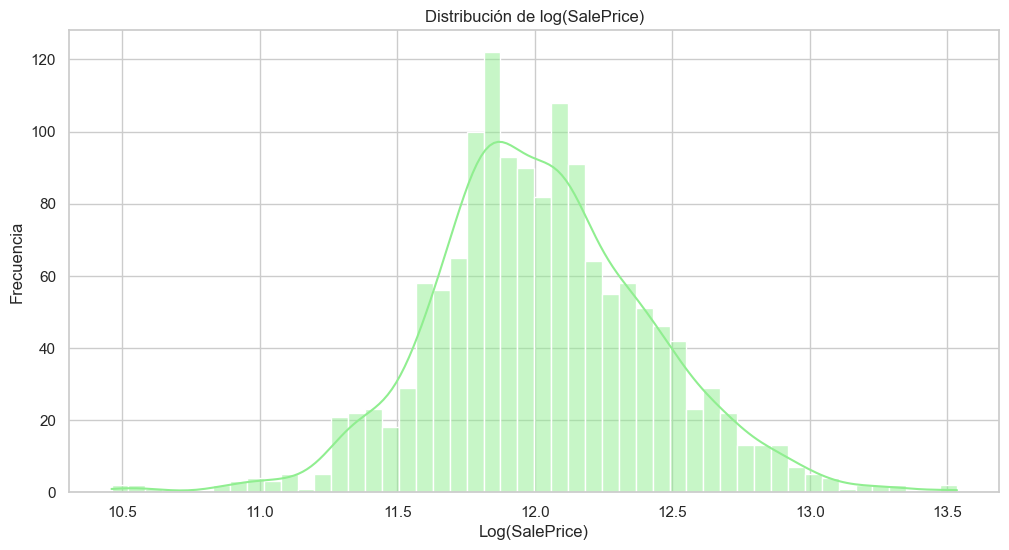

Sesgo después de log: 0.12
Curtosis después de log: 0.80


In [358]:
df['LogSalePrice'] = np.log(df['SalePrice'])

plt.figure(figsize=(12, 6))

sns.histplot(df['LogSalePrice'], kde=True, color='lightgreen', bins=50)
plt.title('Distribución de log(SalePrice)')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frecuencia')
plt.show()

log_skewness = skew(df['LogSalePrice'])
log_kurt = kurtosis(df['LogSalePrice'])

print(f'Sesgo después de log: {log_skewness:.2f}')
print(f'Curtosis después de log: {log_kurt:.2f}')


- El **sesgo** se redujo significativamente, de 1.88 a **0.12**, lo que indica que la distribución logarítmica es prácticamente simétrica.
- La **curtosis** se redujo también de 6.51 a **0.81**, indicando que ahora hay menos concentración extrema alrededor de la media y colas menos pronunciadas.
- Visualmente, `log(SalePrice)` se comporta mucho más parecido a una distribución **normal**.

## Análisis de Correlación y Relaciones Clave con `LogSalePrice`

### Objetivo
Tras transformar `SalePrice` a `LogSalePrice`, es importante entender cómo se relacionan las variables numéricas predictoras con esta nueva variable objetivo. Este análisis es clave para:
- **Identificar predictores relevantes**.
- **Seleccionar variables para los modelos.**
- **Detectar relaciones lineales o no lineales.**

### Estrategia
1. Calcular un **mapa de correlación (heatmap)** para visualizar la relación entre `LogSalePrice` y todas las variables numéricas.
2. Realizar gráficos bivariados (scatterplots) entre `LogSalePrice` y las variables que muestren **alta correlación**.
3. Extraer conclusiones sobre qué variables son más prometedoras como predictoras para el modelo de regresión.


Top 10 Variables más correlacionadas con LogSalePrice:
LogSalePrice    1.000000
SalePrice       0.948374
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Fireplaces      0.489449
MasVnrArea      0.430809
BsmtFinSF1      0.372023
LotFrontage     0.355878
WoodDeckSF      0.334135
OpenPorchSF     0.321053
2ndFlrSF        0.319300
Name: LogSalePrice, dtype: float64


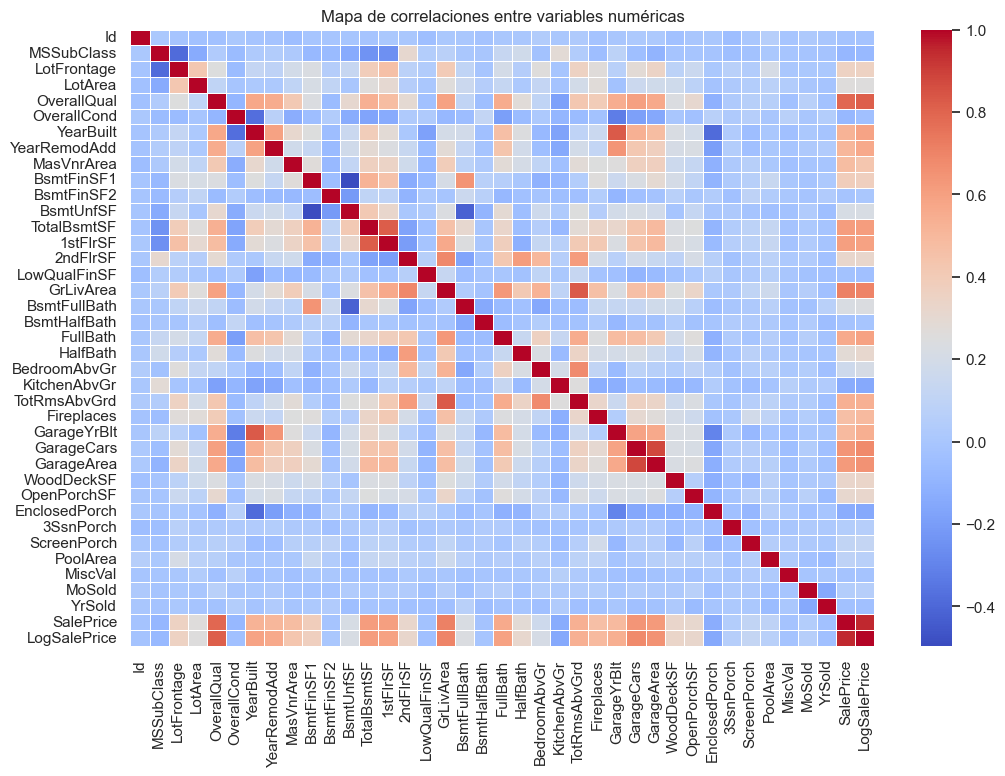

In [359]:
df_numerico['LogSalePrice'] = np.log(df['SalePrice'])

correlation_matrix = df_numerico.corr()

correlation_with_target = correlation_matrix['LogSalePrice'].sort_values(ascending=False)

print("Top 10 Variables más correlacionadas con LogSalePrice:")
print(correlation_with_target.head(20))  

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title('Mapa de correlaciones entre variables numéricas')
plt.show()


### Comparación entre LogSalePrice y SalePrice
Se encuentra importante marcar una diferencia entre ambas variables para verificar que efectivamente existe un cambio significativo al utilizar una escala logarítmica para el valor del precio. Por lo cual se hará un "Scatter-Plot" para ambos casos y se hará una visualización con más variables de interés para realizar un descarte adecuado. Como parte adicional, aunque la "compatibilidad" resalte otras variables, se considera importante incluir el tamaño de la propiedad (LotArea) que es un factor importante de estudio, se verificará su necesidad en futuros pasos.

#### Uso de LogSalePrice

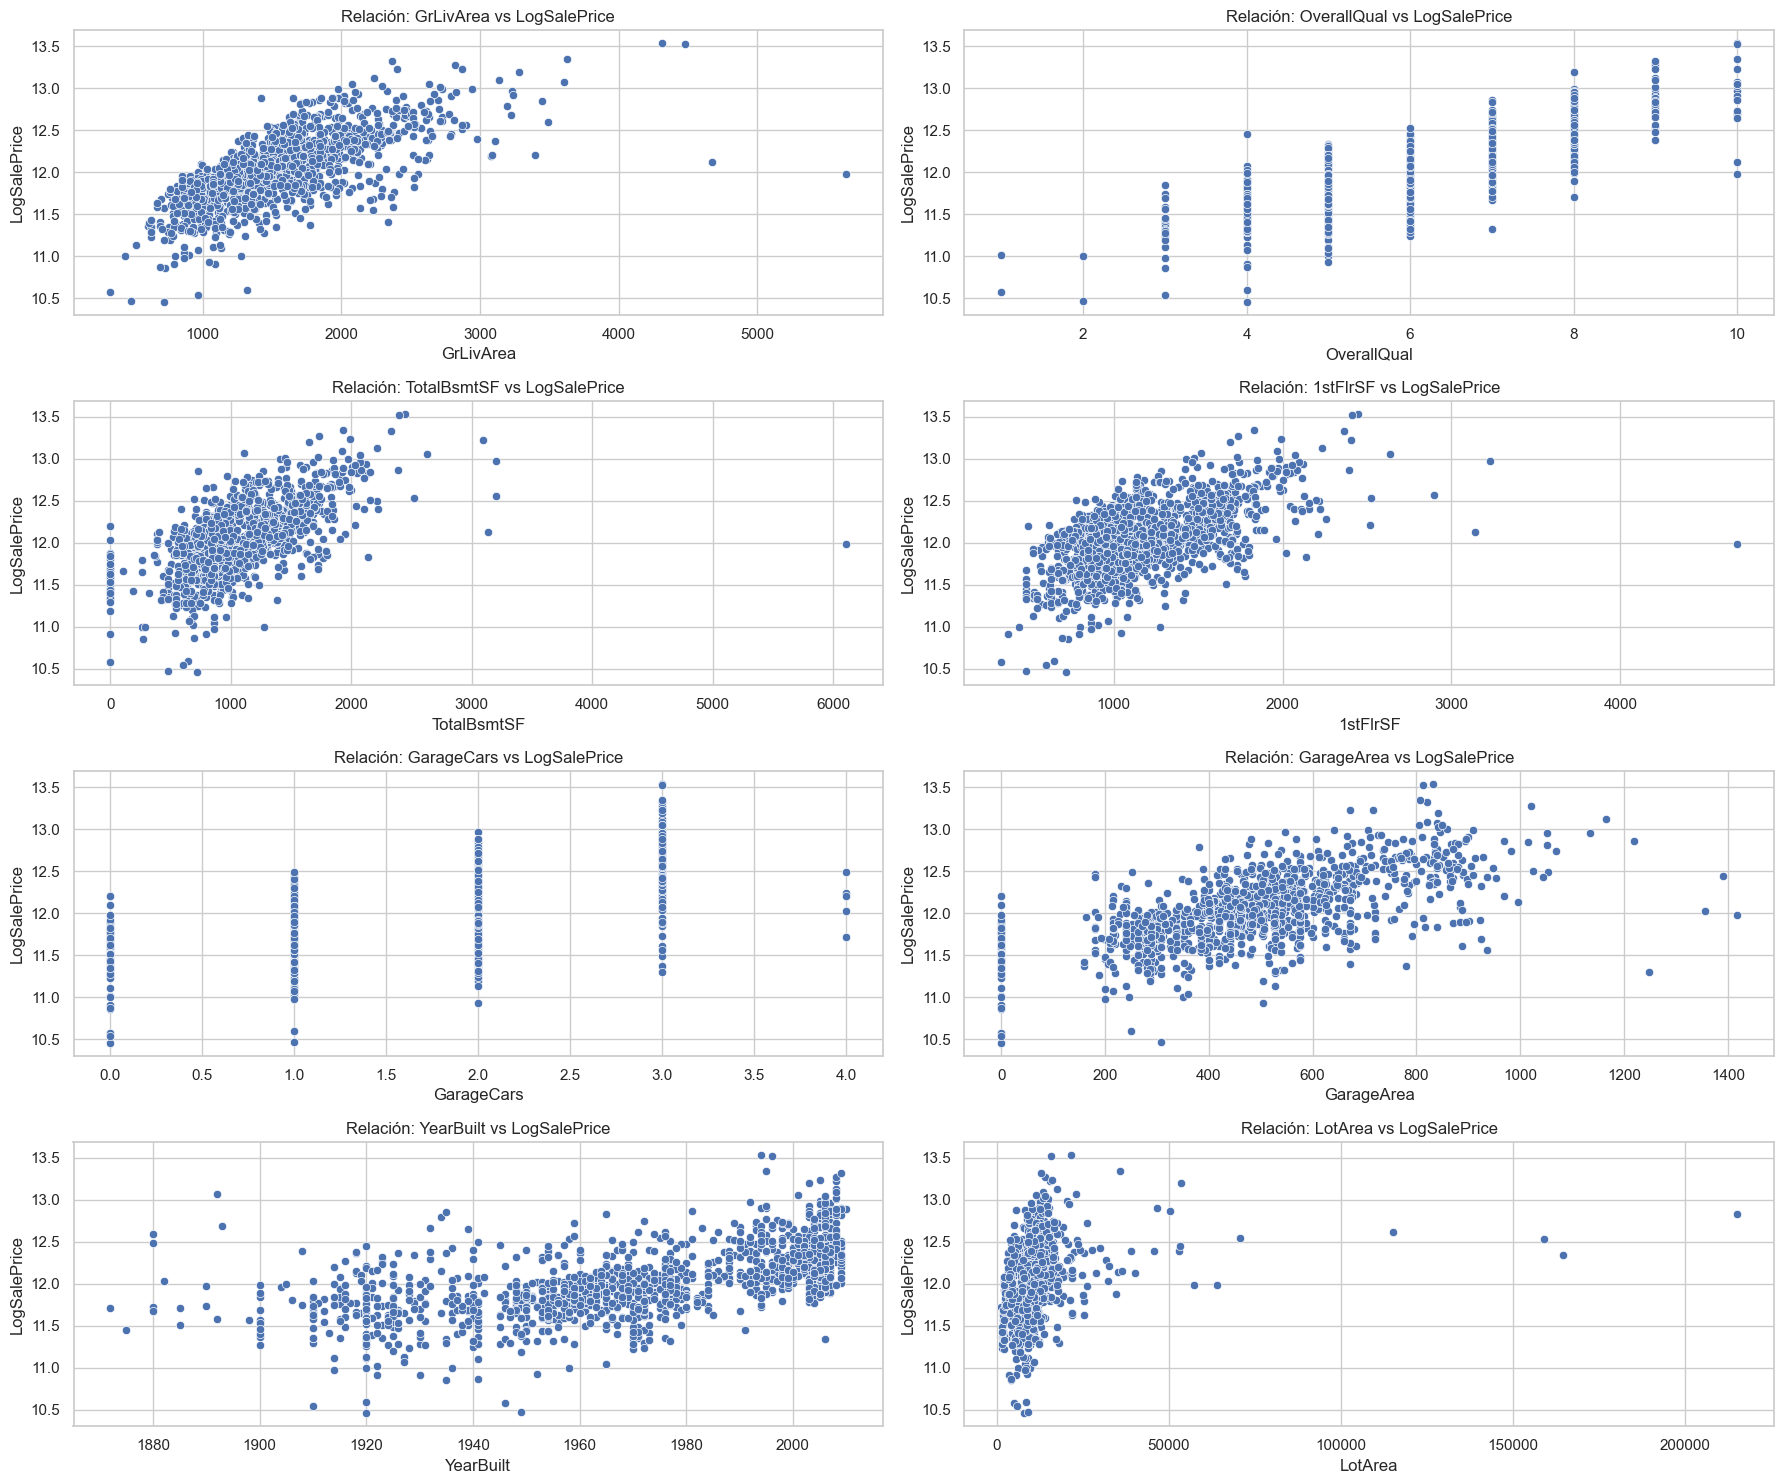

In [360]:
top_predictors = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'LotArea']

plt.figure(figsize=(18, 15))

for i, col in enumerate(top_predictors, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=df_numerico[col], y=df_numerico['LogSalePrice'])
    plt.title(f'Relación: {col} vs LogSalePrice')

plt.tight_layout()
plt.show()


#### Uso de SalePrice

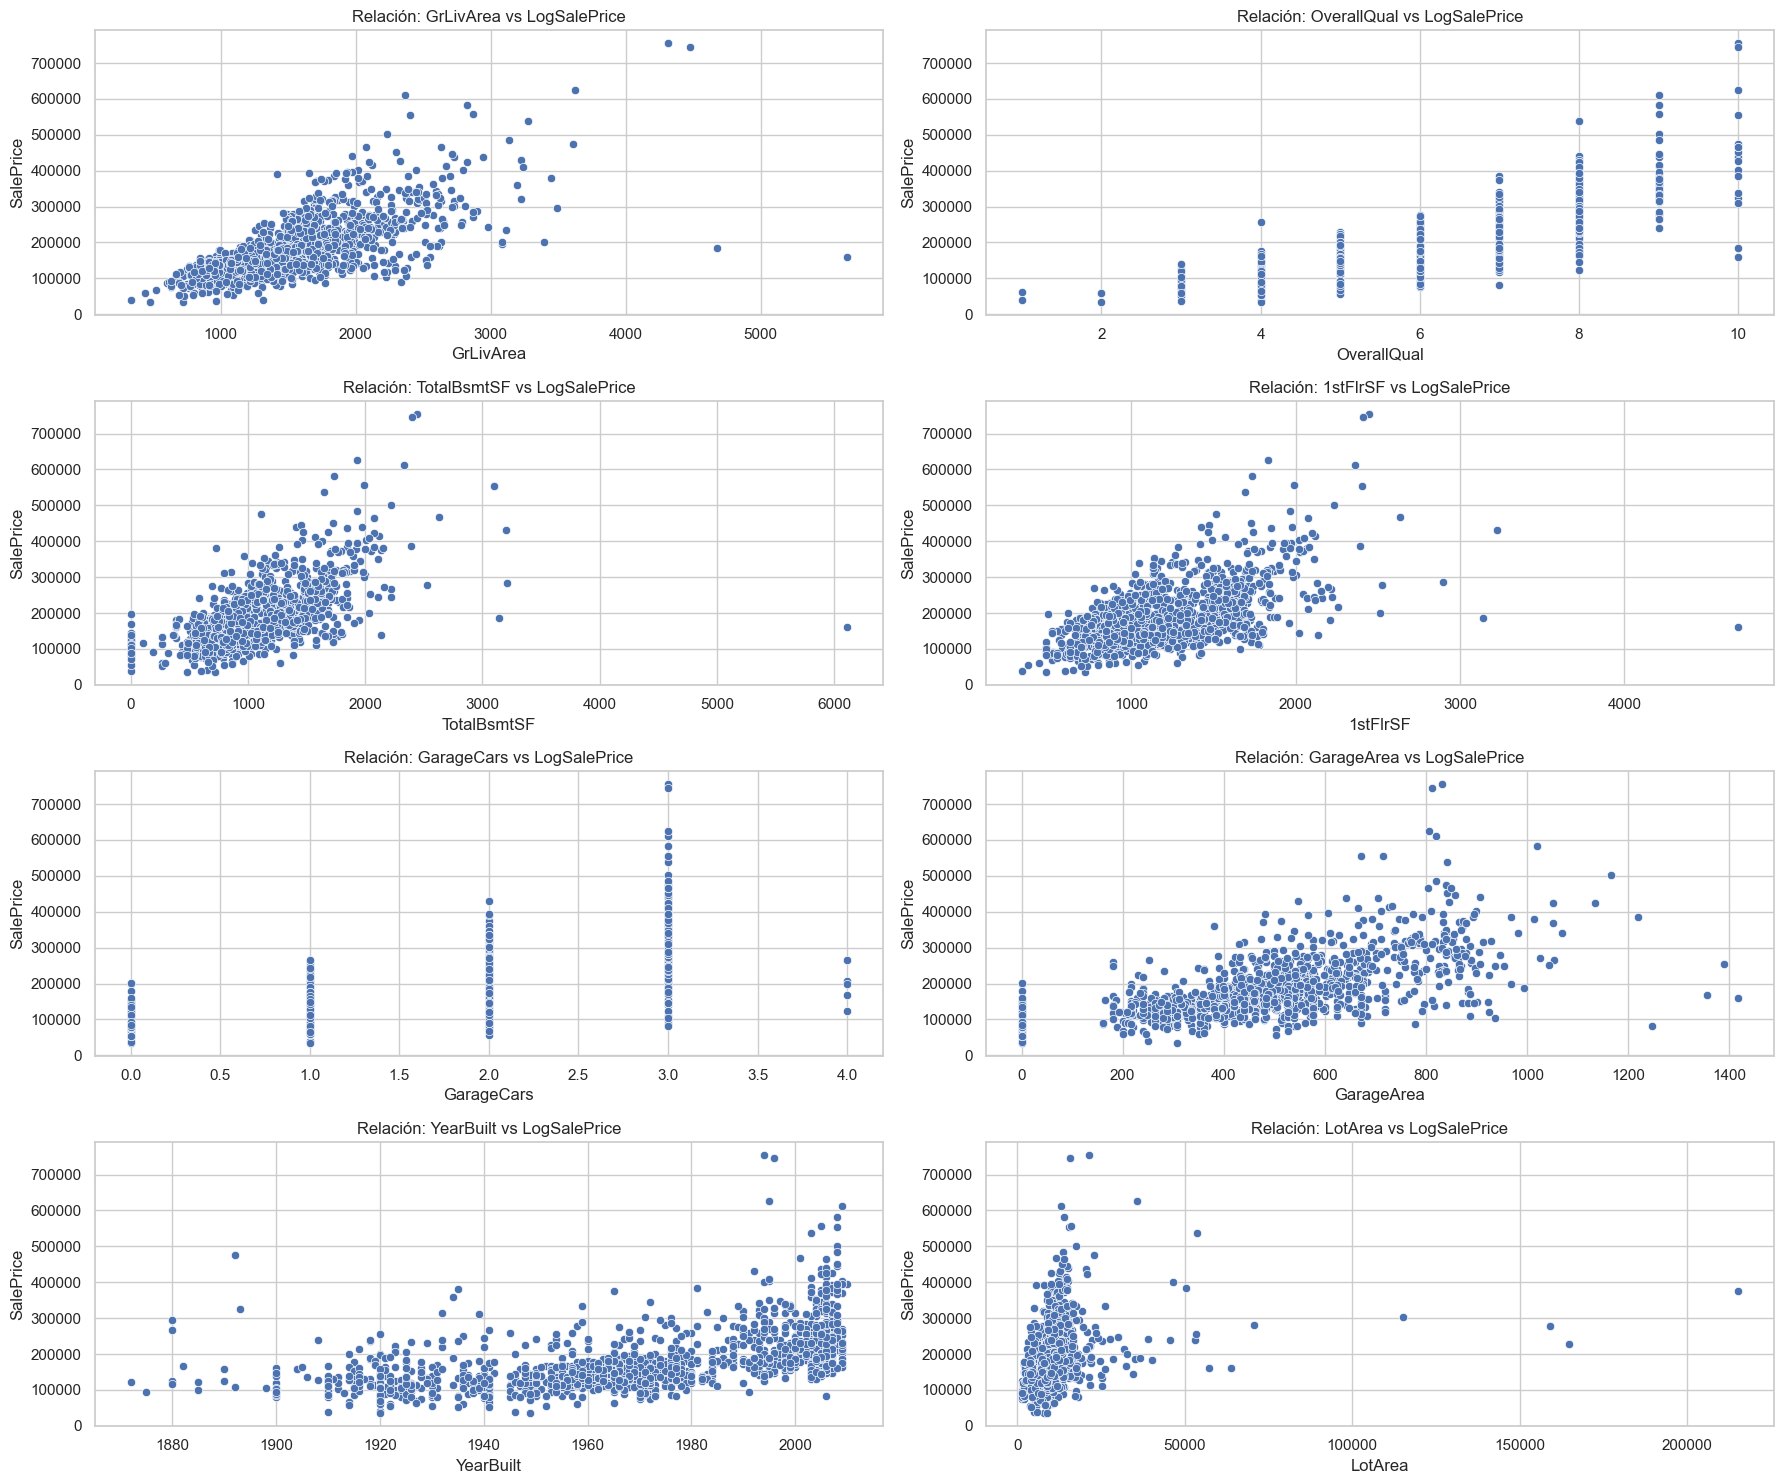

In [361]:
top_predictors = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'LotArea', ]

plt.figure(figsize=(18, 15))

for i, col in enumerate(top_predictors, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=df_numerico[col], y=df_numerico['SalePrice'])
    plt.title(f'Relación: {col} vs LogSalePrice')

plt.tight_layout()
plt.show()

# Variables de predicción 

## Selección de variables

### Previo
Al realizar el análisis exploratorio se encuentra un par de observaciones que podrían ser realmente útiles para llegar hacia una conclusión certera.
Haciendo un recorrido de los pasos realizado, se ha visualizado los outliers y distribución normal de las variables cuantitativas consideradas importantes, después se ha evaluado el valor de Y, que sería la variable de precio el cual es importante, ya que es el output del modelo predictivo. Dada la naturaleza de la información se ha realizado un cambio en los valores de SalePrice -> LogSalePrice lo que en un principio arregla el problema del sesgo a la izquierda, pero modifica considerablemente el output del modelo, el cual es posible modificar posteriomente.
> Esto funciona bajo la suposición de que el modelo en cuestión, mantiene una relación lineal con las diferentes variables, eliminando ese sesgo y normalizando el output esperado.

### Selección de variables
Se observa la matriz de correlación para verificar que las variables con mayor posibilidad de ser parte del modelo predictivo no se encuentren relacionadas entre sí, ha esto le llamamos multicolinealidad. El utilizar variables que se correlacionen demasiado para construir el modelo predictivo podría ser redudante y poco útil cuando se pueden incluir variables más significativas.

#### Variables a priorizar (según scatter plots y correlaciones):
Estas variables corresponden a algunas opciones para tomar en cuenta en la construcción del modelo, algunas en decisión debido a la posible multicolinealidad. Además de una agregada que posteriormente se verificará.

- OverallQual (calidad general de la casa)
- GrLivArea (área habitable sobre nivel del suelo)
- TotalBsmtSF o BsmtFinSF1 (revisar cuál se correlaciona mejor y evita duplicidad)
- GarageCars o GarageArea (elige la que aporte más sin duplicar información)
- YearBuilt o YearRemodAdd (una de las dos, o ambas si capturan aspectos distintos)
- LotArea (tamaño de la propiedad)

#### Selección final
Después de una búsqueda y diferenciación de los diferentes aspectos de cada uno, se ha llegado a la conclusión de que estos podrían ser los parámetros adecuados para el modelo predictivo. Se realizarán las pruebas pertinentes para verificar la calidad del modelo con estos parámetros.

- OverllQual (Escala de calificación de la propiedad)
- GrLivArea (Porción habitable en metros cuadrados)
- TotalBsmtSF (Comprende un área de sótano)
- GarageArea (Es un valor puntual)
- YearRemodAdd (Si no ha recibido remodelaciones, es técnicamente YearBuilt)
- LotArea (Se verificará su utilidad)

# Análisis univariado (Overall Quality)

In [362]:
y = df.pop("LogSalePrice") 
X = df 
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

Basado en el análisis realizado se ha encontrado que el procedimiento requerido era utilizar un conjunto de datos que contara con la variable de estudio SalePrice. Esto debido a la necesidad de hacer una comparación con la predicción dada el modelo después del entrenamiento y el encontrar la cantidad de error que existe en las diferentes observaciones. **La propporción adecuada fue establecida de manera estándar con un 30% de prueba y 70% de entrenamiento**.

In [363]:
#TRAIN
sale_price = y_train.values.reshape(-1,1)
overall_qual = X_train['OverallQual'].values.reshape(-1,1)

#TEST
sale_price_t = y_test.values.reshape(-1,1)
overall_qual_t = X_test['OverallQual'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(overall_qual, sale_price)
sale_price_pred = lm.predict(overall_qual_t)

In [364]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]


label = r'sale_price = %0.4f*overall_qual % + 0.4f '%(m,c)
print(label)

sale_price = 0.2338*overall_qual +10.5952 


Text(0.5, 1.0, 'Test Set Overall Quality vs Log(Sale Price)')

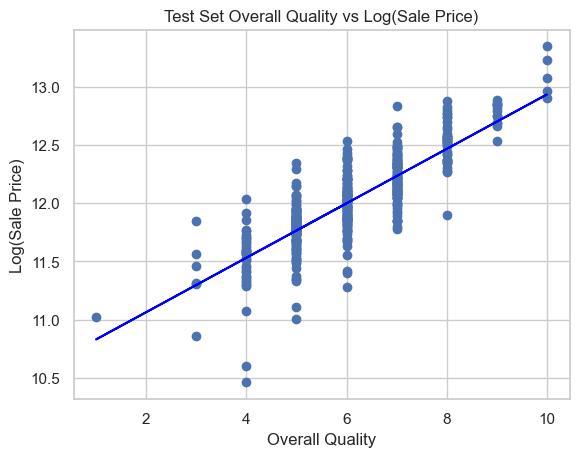

In [365]:
fig = plt.figure()
plt.scatter(overall_qual_t,sale_price_t)
plt.plot(overall_qual_t, sale_price_pred, color="blue") 
plt.xlabel("Overall Quality")
plt.ylabel("Log(Sale Price)")
plt.title("Test Set Overall Quality vs Log(Sale Price)")

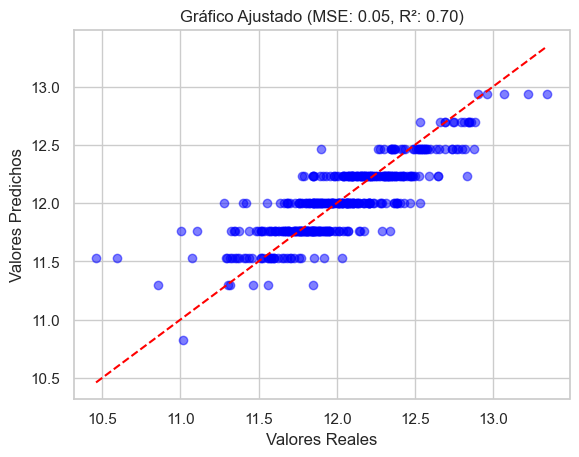

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     1001.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          5.56e-115
Time:                        17:46:05   Log-Likelihood:                 50.661
No. Observations:                 438   AIC:                            -97.32
Df Residuals:                     436   BIC:                            -89.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4047      0.393     -1.030      0.3

In [366]:
mse = mean_squared_error(sale_price_t, sale_price_pred)
r2 = r2_score(sale_price_t, sale_price_pred)

plt.scatter(sale_price_t, sale_price_pred, color="blue", alpha=0.5)
plt.plot([min(sale_price_t), max(sale_price_t)], [min(sale_price_t), max(sale_price_t)], color="red", linestyle="--")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"Gráfico Ajustado (MSE: {mse:.2f}, R²: {r2:.2f})")
plt.show()

X = sm.add_constant(sale_price_pred)  
modelo = sm.OLS(sale_price_t, X).fit()

print(modelo.summary())

In [367]:
residuales = sale_price_t - sale_price_pred
len(residuales)

438

In [368]:
for i in range(0,len(sale_price_t)):
    print(sale_price_t[i], sale_price_pred[i], " --> ", "\t\tDIFF:",sale_price_t[i] - sale_price_pred[i])

[11.8493977] [11.9978316]  -->  		DIFF: [-0.1484339]
[11.96400108] [11.9978316]  -->  		DIFF: [-0.03383052]
[11.56171563] [11.76406261]  -->  		DIFF: [-0.20234698]
[11.46163217] [11.29652461]  -->  		DIFF: [0.16510756]
[12.21106019] [11.9978316]  -->  		DIFF: [0.21322858]
[12.02574909] [11.9978316]  -->  		DIFF: [0.02791749]
[12.04355372] [12.2316006]  -->  		DIFF: [-0.18804689]
[12.7512997] [12.6991386]  -->  		DIFF: [0.0521611]
[12.16525065] [11.9978316]  -->  		DIFF: [0.16741905]
[12.19095901] [12.2316006]  -->  		DIFF: [-0.0406416]
[11.66134547] [11.76406261]  -->  		DIFF: [-0.10271714]
[11.36210258] [11.53029361]  -->  		DIFF: [-0.16819103]
[11.28978191] [11.53029361]  -->  		DIFF: [-0.2405117]
[11.81672692] [11.76406261]  -->  		DIFF: [0.05266431]
[12.54254488] [12.4653696]  -->  		DIFF: [0.07717528]
[12.1281111] [12.2316006]  -->  		DIFF: [-0.1034895]
[11.34450681] [11.76406261]  -->  		DIFF: [-0.41955579]
[11.77528973] [11.76406261]  -->  		DIFF: [0.01122712]
[11.45899712] [11.

In [369]:
differences = [abs(t - p) for t, p in zip(sale_price_t, sale_price_pred)]

max_index = differences.index(max(differences))

max_real_value = sale_price_t[max_index]
max_pred_value = sale_price_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")


Índice: 84
Valor real: [10.46024211]
Valor predicho: [11.53029361]
Diferencia máxima: [1.0700515]


Text(0, 0.5, 'Residuales')

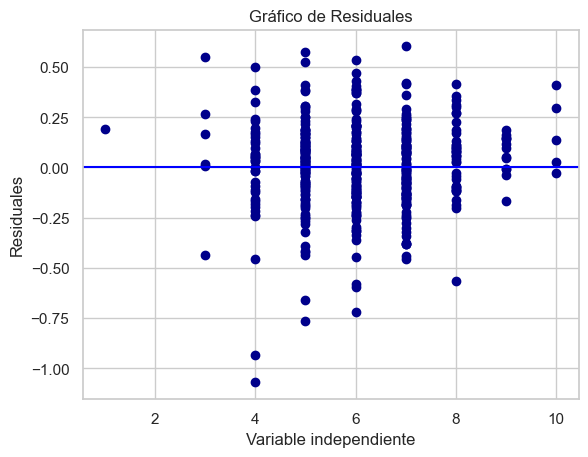

In [370]:
plt.plot(overall_qual_t,residuales, 'o', color='darkblue')
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

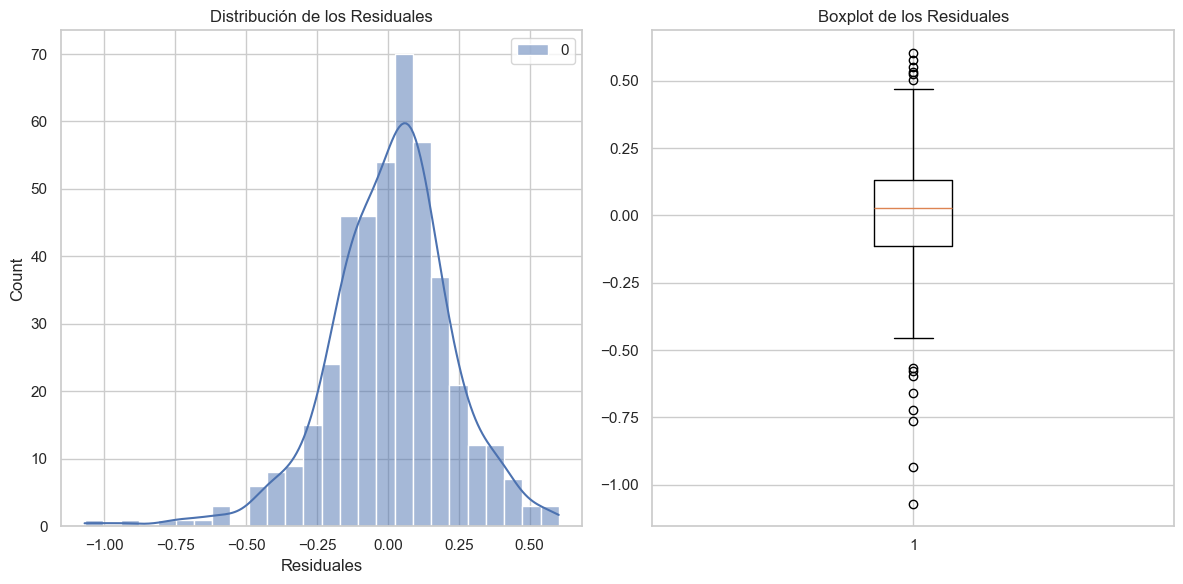

In [371]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuales, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")

plt.subplot(1, 2, 2)
plt.boxplot(residuales)
plt.title("Boxplot de los Residuales")

plt.tight_layout()
plt.show()


# Analisis completo de las variables numericas

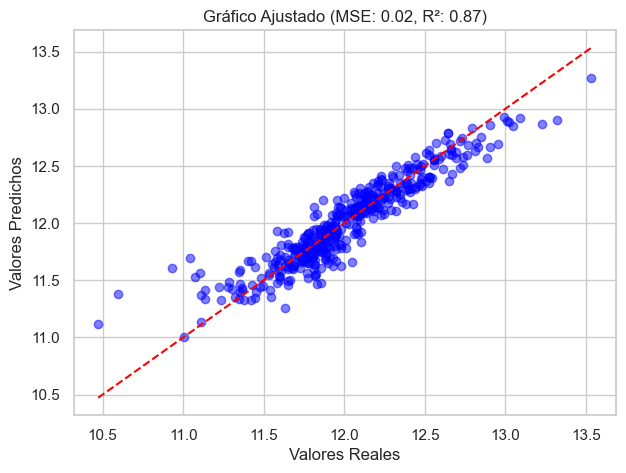

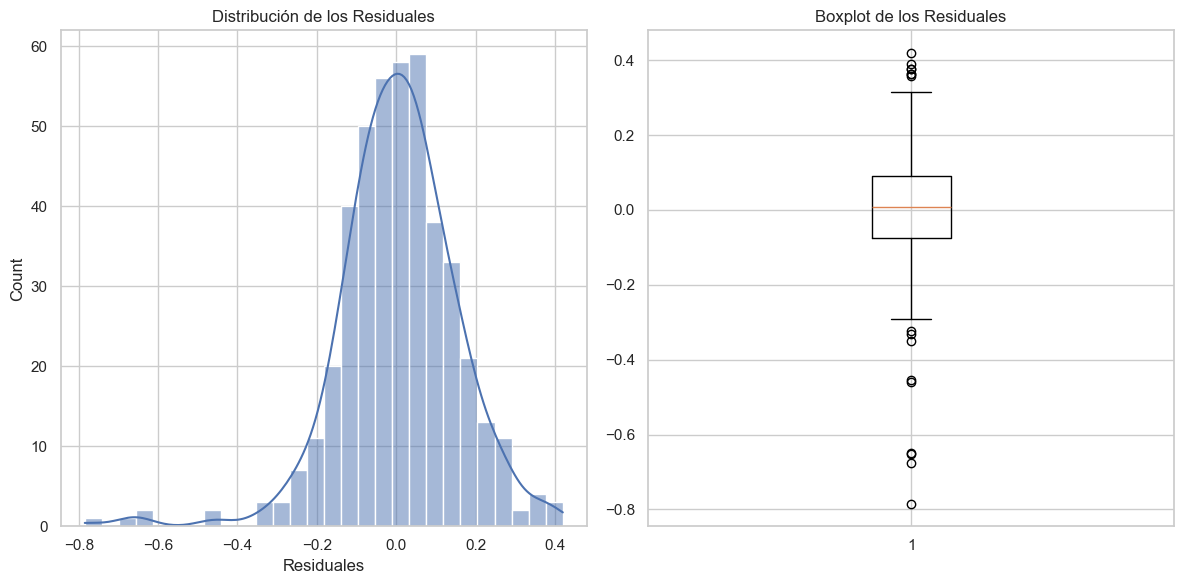

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:46:06   Log-Likelihood:                 517.79
No. Observations:                1021   AIC:                            -963.6
Df Residuals:                     985   BIC:                            -786.2
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0979      7.283      1.387

In [372]:
X = df_numerico.drop(columns=['SalePrice', 'LogSalePrice']) 
y = np.log(df['SalePrice']) 

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

X_train_sm = sm.add_constant(X_train)
modelo = sm.OLS(y_train, X_train_sm).fit()

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"Gráfico Ajustado (MSE: {mse:.2f}, R²: {r2:.2f})")
plt.show()

residuales = y_test - y_pred

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuales, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")

plt.subplot(1, 2, 2)
plt.boxplot(residuales)
plt.title("Boxplot de los Residuales")

plt.tight_layout()
plt.show()

print(modelo.summary())

mse_train = mean_squared_error(y_train, lm.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print(f"MSE en Entrenamiento: {mse_train:.4f}")
print(f"MSE en Prueba: {mse_test:.4f}")

if mse_test > (mse_train * 1.5):
    print("⚠️ Posible Overfitting: El error en prueba es significativamente mayor que en entrenamiento.")
else:
    print("✅ No hay signos de Overfitting: El error en prueba es similar al de entrenamiento.")


### Análisis de Multicolinealidad

#### Evidencias de multicolinealidad detectadas
1. **Advertencia en el summary:**  
   El mensaje:
   The smallest eigenvalue is 1.4e-21. This might indicate that there are strong multicollinearity problems or that the design matrix is singular."
   Este es un indicador directo de que **algunas variables están altamente correlacionadas entre sí**, al punto de casi colapsar el modelo.

2. **Coeficientes inesperadamente bajos o nulos**:  
   - Variables como `Id`, `MasVnrArea`, `BsmtFinSF1`, y otras tienen coeficientes muy cercanos a cero o directamente no significativos (`P>|t|` > 0.05).
   - Esto indica que probablemente esas variables aportan **poca o ninguna información nueva**, porque su efecto ya está capturado por otras variables correlacionadas.

3. **Variables altamente correlacionadas (colineales)**:  
   Al trabajar con muchas variables numéricas relacionadas (superficies, tamaños de lotes, año de construcción, etc.), es normal que existan **colinealidades**. Por ejemplo:
   - `GrLivArea` y `1stFlrSF` miden dimensiones relacionadas.
   - `YearBuilt` y `YearRemodAdd` suelen estar muy correlacionados.

### Evidencia de Sobreajuste (Overfitting)
- El modelo tiene **muchas variables innecesarias** (p > 0.05) que no aportan información valiosa.
- Esto es **una señal de sobreajuste**, ya que el modelo está ajustando demasiado al dataset de entrenamiento, capturando ruido en lugar de relaciones generales.
- Un modelo más simple, con variables seleccionadas, podría lograr un rendimiento similar (o mejor) en el conjunto de prueba.


Tras el análisis del modelo completo, se identificaron problemas de **multicolinealidad** y la presencia de variables que no aportan significativamente al modelo (p-valores altos). Para mejorar la estabilidad y la capacidad de generalización del modelo, se opta por construir un modelo reducido utilizando solo las **variables más relevantes y significativas**, según los siguientes criterios:

### Variables Seleccionadas
| Variable | Descripción | Justificación |
|---|---|---|
| **GrLivArea** | Área habitable sobre el suelo | Alta correlación (r ≈ 0.71) y fuerte relación teórica con el precio. |
| **OverallQual** | Calidad general de la vivienda | Es la variable más correlacionada con `LogSalePrice` (r ≈ 0.82). |
| **1stFlrSF** | Área del primer piso | Representa una parte clave de la superficie total y tiene alta correlación. |
| **GarageCars** | Capacidad de autos en garaje | Factor práctico de valor, altamente correlacionado (r ≈ 0.64). |
| **YearBuilt** | Año de construcción | Refleja antigüedad, relevante para valorar condición y valor de la casa. |
| **LotArea** | Tamaño del terreno | Aporta información complementaria sobre el tamaño de la propiedad. |


# Análsis multivariable (Overall Quality, Ground Living Area, First Floor Area, Year Built, Garage Cars)
Dadas las variables encontradas tras el análsis anterior de todas las variables numéricas, se realiza una comparación con lo observaciones encontradas en el análisis exploratorio y los resultados del ejercicio anterior. Una vez descartadas las variables que dejan el modelo con multicolinealidad, se hace una rectificación de dichas variables tras haber realizado un modelo y obtenido ciertos insights necesario para crear un modelo más optimizado y funcional. Esto es lo que se encontró:

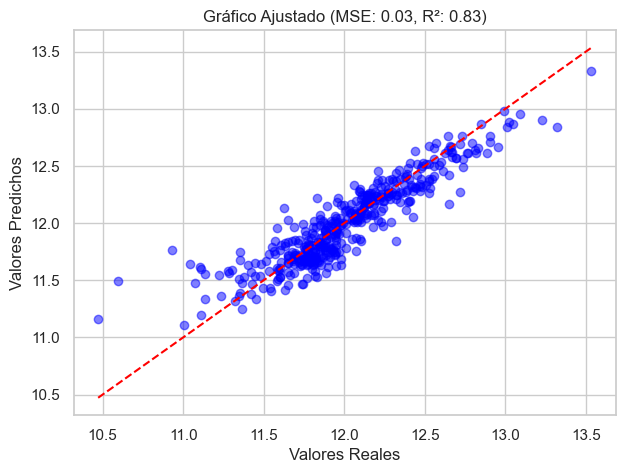

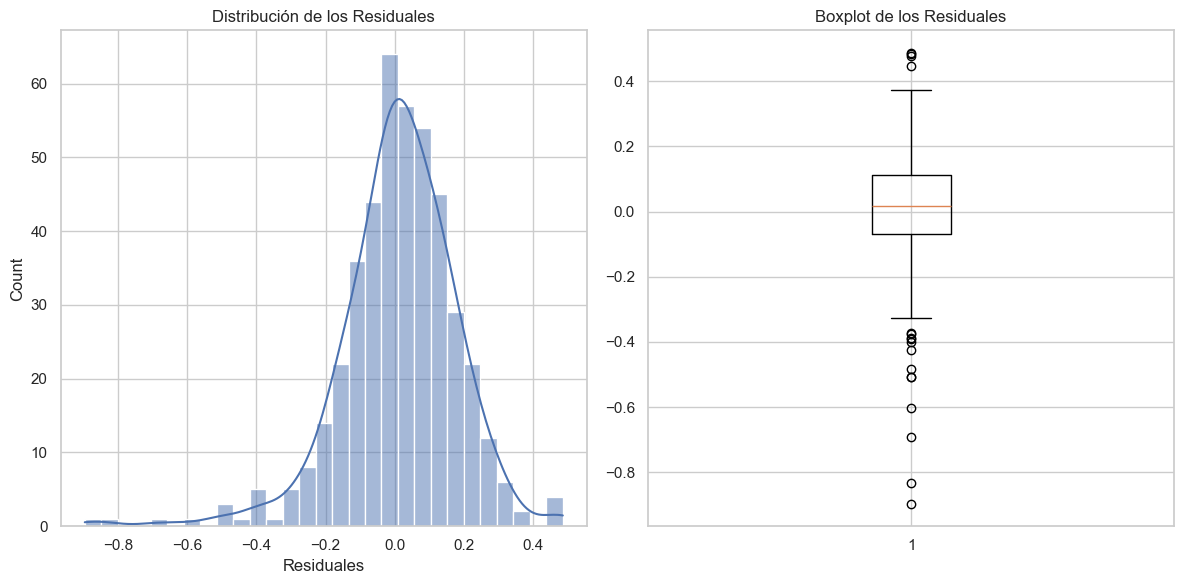

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     709.2
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:46:06   Log-Likelihood:                 343.78
No. Observations:                1021   AIC:                            -673.6
Df Residuals:                    1014   BIC:                            -639.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.8155      0.442     13.147      

In [373]:
top_predictors_picked = ['GrLivArea', 'OverallQual', '1stFlrSF', 'GarageCars', 'YearBuilt', 'LotArea', ]

X_filtered = df[top_predictors_picked]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, train_size=0.7, random_state=42)

lm_filtered = LinearRegression()
lm_filtered.fit(X_train, y_train)

y_pred_filtered = lm_filtered.predict(X_test)

mse_filtered = mean_squared_error(y_test, y_pred_filtered)
r2_filtered = r2_score(y_test, y_pred_filtered)

X_train_sm_filtered = sm.add_constant(X_train)  
modelo_filtered = sm.OLS(y_train, X_train_sm_filtered).fit()

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_filtered, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"Gráfico Ajustado (MSE: {mse_filtered:.2f}, R²: {r2_filtered:.2f})")
plt.show()

residuales_filtered = y_test - y_pred_filtered

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuales_filtered, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")

plt.subplot(1, 2, 2)
plt.boxplot(residuales_filtered)
plt.title("Boxplot de los Residuales")

plt.tight_layout()
plt.show()

print(modelo_filtered.summary())

mse_train = mean_squared_error(y_train, lm_filtered.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred_filtered)

print(f"MSE en Entrenamiento: {mse_train:.4f}")
print(f"MSE en Prueba: {mse_test:.4f}")

if mse_test > (mse_train * 1.5):
    print("⚠️ Posible Overfitting: El error en prueba es significativamente mayor que en entrenamiento.")
else:
    print("✅ No hay signos de Overfitting: El error en prueba es similar al de entrenamiento.")



#### Interpretación:
- Un **R² de 0.83** indica que el modelo explica aproximadamente el **83% de la variabilidad** en el precio (en escala logarítmica). Esto es un muy buen ajuste para un modelo inmobiliario, dado que el precio de las casas es multifactorial.
- El **MSE de 0.03** es bastante bajo, lo cual indica que las predicciones están bastante cercanas a los valores reales (en escala log).


### Análisis Gráfico: Valores Reales vs Predichos
- La nube de puntos se alinea bien a la **línea ideal** (diagonal roja), lo que indica que el modelo **tiene buen poder predictivo**.
- No se observan grandes patrones sistemáticos de error, lo que es una buena señal de ajuste lineal adecuado.


### Análisis de Residuales
- El **histograma de residuos** muestra que estos tienen una distribución aproximadamente **normal**, centrada en cero. Esto cumple una de las **hipótesis clave** para regresión lineal.
- El **boxplot de residuos** confirma que hay algunos valores atípicos, lo cual es **esperable** en datos inmobiliarios, dado que hay propiedades especiales (muy lujosas o muy deterioradas) que escapan de lo común.

# Observación de modelos

## Modelo Univariado (OverallQual):
**Características:** Se utilizó únicamente la variable OverallQual, que es la que presenta mayor correlación individual con el precio en escala logarítmica.

**Desempeño:** Aunque OverallQual capta parte de la variabilidad en LogSalePrice, el modelo es limitado porque no aprovecha toda la información disponible. Los errores de predicción y la dispersión en los residuales evidencian que, si bien la variable es potente, por sí sola no es suficiente para una predicción precisa.

## Modelo Multivariable con Todas las Variables Numéricas:
**Características:** Se incorporaron todas las numéricas del dataset.

**Desempeño:** Este modelo mostró problemas de multicolinealidad, evidenciados por advertencias en el summary (coeficientes cercanos a cero y eigenvalores extremadamente pequeños). La inclusión de variables redundantes genera inestabilidad en los coeficientes y, a pesar de que el modelo ajusta bien el conjunto de entrenamiento, se observa un riesgo de sobreajuste y un desempeño inferior en el conjunto de prueba.

## Modelo Multivariable con Variables Seleccionadas:
**Características:** Se seleccionaron las variables más relevantes según el análisis exploratorio y la matriz de correlaciones: GrLivArea, OverallQual, 1stFlrSF, GarageCars, YearBuilt y LotArea.

**Desempeño:** Este modelo alcanzó un R² de aproximadamente 0.83 y un MSE muy bajo en el conjunto de prueba. La distribución de los residuales es cercana a la normal, lo que sugiere un buen ajuste del modelo sin signos evidentes de sobreajuste.

Métricas de los 3 modelos:
Univariado (OverallQual):      MSE=0.0467,  R²=0.6952
Multivariable (Todas Num.):    MSE=0.0222,  R²=0.8693
Multivariable (Seleccionadas): MSE=0.0286, R²=0.8315


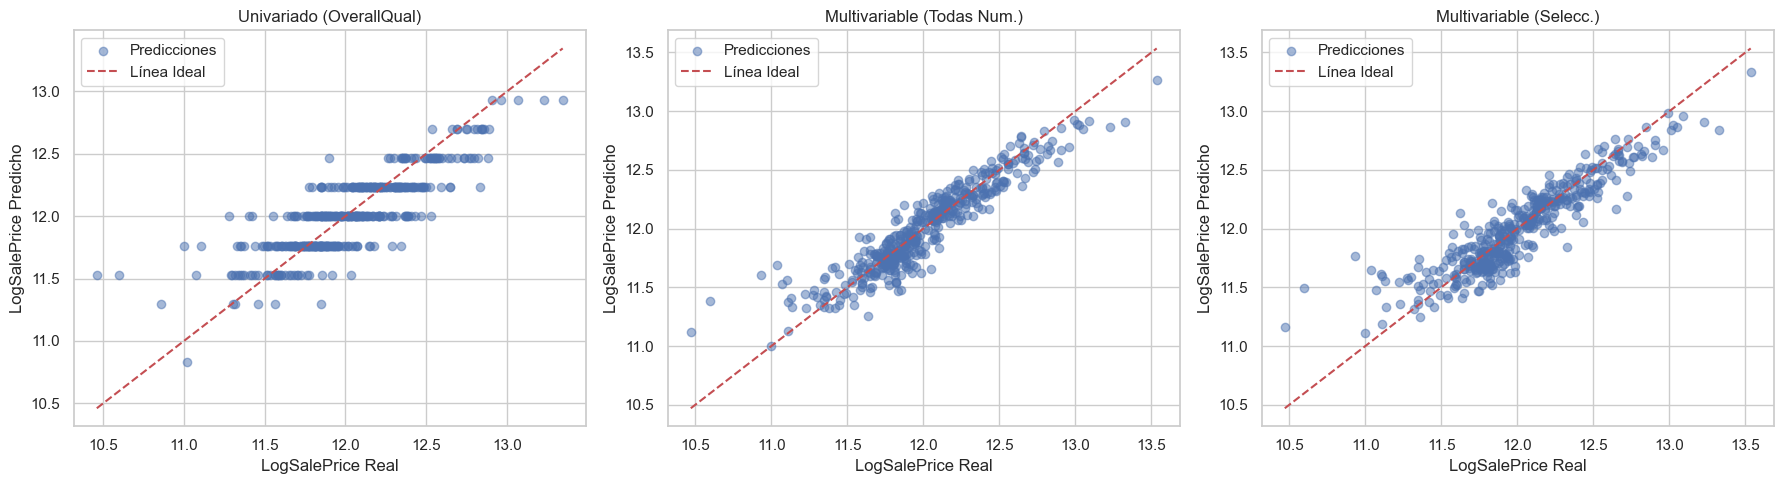

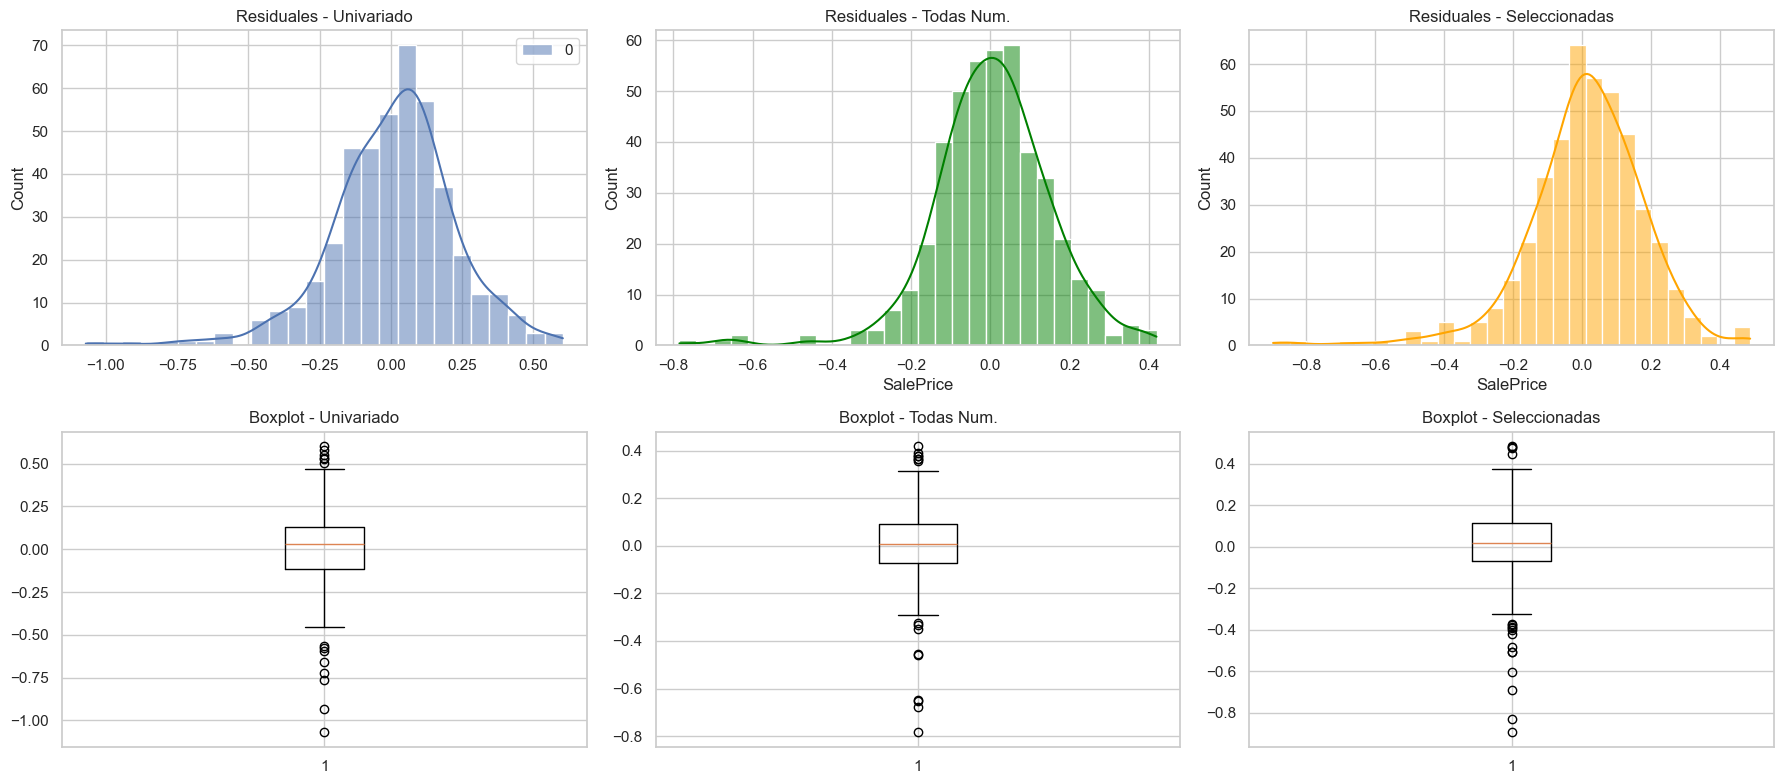

In [376]:
mse_uni = mean_squared_error(sale_price_t, sale_price_pred)
r2_uni = r2_score(sale_price_t, sale_price_pred)
residuales_uni = sale_price_t - sale_price_pred

mse_all = mean_squared_error(y_test, y_pred)
r2_all = r2_score(y_test, y_pred)
residuales_all = y_test - y_pred

mse_filt = mean_squared_error(y_test, y_pred_filtered)
r2_filt = r2_score(y_test, y_pred_filtered)
residuales_filt = y_test - y_pred_filtered

print("Métricas de los 3 modelos:")
print(f"Univariado (OverallQual):      MSE={mse_uni:.4f},  R²={r2_uni:.4f}")
print(f"Multivariable (Todas Num.):    MSE={mse_all:.4f},  R²={r2_all:.4f}")
print(f"Multivariable (Seleccionadas): MSE={mse_filt:.4f}, R²={r2_filt:.4f}")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(sale_price_t, sale_price_pred, alpha=0.5, label='Predicciones')
plt.plot([sale_price_t.min(), sale_price_t.max()],
         [sale_price_t.min(), sale_price_t.max()],
         'r--', label='Línea Ideal')
plt.xlabel("LogSalePrice Real")
plt.ylabel("LogSalePrice Predicho")
plt.title("Univariado (OverallQual)")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label='Línea Ideal')
plt.xlabel("LogSalePrice Real")
plt.ylabel("LogSalePrice Predicho")
plt.title("Multivariable (Todas Num.)")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_filtered, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label='Línea Ideal')
plt.xlabel("LogSalePrice Real")
plt.ylabel("LogSalePrice Predicho")
plt.title("Multivariable (Selecc.)")
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
sns.histplot(residuales_uni, kde=True, color='blue')
plt.title("Residuales - Univariado")

plt.subplot(2, 3, 2)
sns.histplot(residuales_all, kde=True, color='green')
plt.title("Residuales - Todas Num.")

plt.subplot(2, 3, 3)
sns.histplot(residuales_filt, kde=True, color='orange')
plt.title("Residuales - Seleccionadas")

plt.subplot(2, 3, 4)
plt.boxplot(residuales_uni)
plt.title("Boxplot - Univariado")

plt.subplot(2, 3, 5)
plt.boxplot(residuales_all)
plt.title("Boxplot - Todas Num.")

plt.subplot(2, 3, 6)
plt.boxplot(residuales_filt)
plt.title("Boxplot - Seleccionadas")

plt.tight_layout()
plt.show()



### Observación final.
El modelo univariado basado en OverallQual ofrece una base sólida al capturar parte de la variabilidad en los precios, pero su simplicidad limita la capacidad predictiva, ya que depende exclusivamente de una única variable. Aunque OverallQual es un predictor potente, su uso aislado no permite abarcar la complejidad y las múltiples facetas que influyen en el precio de las viviendas.

Por otro lado, el modelo multivariable que incorpora todas las variables numéricas muestra un desempeño sobresaliente (R²=0.8693, MSE=0.0222), lo cual indica que, en términos globales, el modelo es capaz de explicar gran parte de la variabilidad en LogSalePrice. Sin embargo, la inclusión de una cantidad tan elevada de variables genera problemas de redundancia y multicolinealidad, lo que se traduce en coeficientes inestables y un mayor riesgo de sobreajuste. Además, la imputación de valores faltantes (NAN) en este conjunto afectó significativamente la cantidad de datos disponibles para el entrenamiento, lo que podría alterar la robustez y generalización de las predicciones.

En contraste, el modelo multivariable reducido, basado en la selección de variables clave (GrLivArea, OverallQual, 1stFlrSF, GarageCars, YearBuilt y LotArea), combina precisión, interpretabilidad y robustez. Este modelo logra explicar aproximadamente el 83% de la variabilidad de LogSalePrice y presenta errores bajos tanto en entrenamiento como en prueba, lo que lo convierte en una opción equilibrada al evitar la sobrecarga de información redundante.

Finalmente, se optó por utilizar LogSalePrice en lugar de SalePrice debido a que la distribución original de los precios de venta mostraba un marcado sesgo hacia la derecha y una elevada curtosis, evidenciando la presencia de valores atípicos extremos y una distribución no normal. La transformación logarítmica reduce significativamente el sesgo, estabiliza la varianza y aproxima la distribución a la normalidad, aspectos fundamentales para cumplir con los supuestos de la regresión lineal y para que el modelo capture dichas variables para obtener el precio de una viviendo, esto es puntualmente interesante dada la variabilidad de viviendas de un costo de 100,000 hasta 1M.